# Test Measure of Baseball Performance

***This notebook is a brief, simplistic look into designing a baseball statistic that accurately measures value created in offensive player performance. More versions to follow with updates and further research into advanced stats such as wOBA or WRC+. For now, this notebook explores the basic metrics such as OBP, SLG, and OPS, while factoring strikeouts as a negative value.***

 

This data exploration uses Slugging percentage which is based on a total bases scale (HR = 4, Triple = 3, etc..), adding Walk percentage per Plate Appearance, and subtracting Strikeout percentage per Plate Appearance. 

Purely a test but the goal is to subtract strikeouts from player performance metrics, which can counter the growing trend around the league of increasing home runs at the cost of strikeouts. This metric attempts to factor in that cost of strikeouts, because these plays do not contribute in ways of sac flies, advancing runners, and forcing errors, all of which can add value to a team. A high strikeout player will be affected by this metric. 

Walks / Plate Appearances reveals the percentage of plate appearances that results in a walk. K / Plate Appearances offers a negative value for those players that fail to put the ball in play. SLG offers a measurement to factor in the increased value of a Home Run versus a Single. Work in progress, but these are my first thoughts on SLG + BB/PA - K/PA. 

In [112]:
#Libaries

import pandas as pd
import seaborn as sns
%matplotlib inline
import copy
import matplotlib.pyplot as plt

In [113]:
#BASEBALL DATA DOWNLOADED FROM:
#http://www.seanlahman.com/baseball-archive/statistics/
#Stats included from 1871 - 2020

#Filling N/A columns with 0 value (Relates to pitchers and old data)
batting = pd.read_csv(r'C:\Users\ncfis\Desktop\Python Files\Tests\Baseball\Batting.csv')
batting = batting.fillna(0)

#CREATING PA, AVG, OBP, SLG, OPS
batting['PA'] = batting['AB'] + batting['HBP'] + batting['SH'] + batting['SF'] + batting["BB"]
batting['AVG'] = batting["H"]/batting["AB"]
batting['OBP'] = (batting["H"]+batting["BB"]+batting["HBP"])/(batting["BB"]+batting["HBP"]+batting["AB"]+batting["SF"])
batting['SLG'] = ((batting["H"]-(batting['2B']+batting['3B']+batting['HR'])) +(batting['2B']*2)+ (batting['3B']*3)+ (batting['HR']*4)) / (batting['AB']) 
batting['Test_SLG'] = ((batting["H"]-(batting['2B']+batting['3B']+batting['HR'])) +(batting['2B']*2)+ (batting['3B']*3)+ (batting['HR']*4)) / (batting['PA']) 
batting['OPS'] = batting['SLG'] + batting['OBP']

#ROUNDING NUMBERS TO 3 DECIMALS
batting['AVG'] = batting['AVG'].round(decimals = 3)
batting['OBP'] = batting['OBP'].round(decimals = 3)
batting['SLG'] = batting['SLG'].round(decimals = 3)
batting['OPS'] = batting['OPS'].round(decimals = 3)

In [114]:
#Creating copy Dataframe and ensuring all columns will be displayed without shortened views
batters = batting.copy()
pd.set_option('display.max_columns', 500)

#Creating columns for Walks / PA  and  Strikeouts / PA
batters['BBperc'] = batters['BB'] / batters['PA']
batters['SOperc'] = batters['SO'] / batters['PA']
batters['BBperc'] = batters['BBperc'].round(decimals = 3)
batters['SOperc'] = batters['SOperc'].round(decimals = 3)


In [115]:
#SLG + BB/PA - K/PA

batters["TEST"] = batters["Test_SLG"]+batters["BBperc"] - batters["SOperc"]

In [116]:
#Filtering dataframe by random year and qualifying plate appearances (3.1 PA per team game)
#Sorting by TEST column 

batters.loc[(batters.yearID == 2020) & (batting.PA > 180)].sort_values(by = "TEST", ascending = False).head(10)

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,PA,AVG,OBP,SLG,Test_SLG,OPS,BBperc,SOperc,TEST
108582,sotoju01,2020,1,WAS,NL,47,154,39,54,14,0,13,37.0,6.0,2.0,41,28.0,12.0,1.0,0.0,0.0,1.0,196.0,0.351,0.490,0.695,0.545918,1.185,0.209,0.143,0.611918
107830,freemfr01,2020,1,ATL,NL,60,214,51,73,23,1,13,53.0,2.0,0.0,45,37.0,7.0,3.0,0.0,0.0,6.0,262.0,0.341,0.462,0.640,0.522901,1.102,0.172,0.141,0.553901
108125,lemahdj01,2020,1,NYA,AL,50,195,41,71,10,2,10,27.0,3.0,0.0,18,21.0,0.0,2.0,0.0,1.0,3.0,216.0,0.364,0.421,0.590,0.532407,1.011,0.083,0.097,0.518407
108420,ramirjo01,2020,1,CLE,AL,58,219,45,64,16,1,17,46.0,10.0,3.0,31,43.0,0.0,3.0,0.0,1.0,2.0,254.0,0.292,0.386,0.607,0.523622,0.993,0.122,0.169,0.476622
108674,turnetr01,2020,1,WAS,NL,59,233,46,78,15,4,12,41.0,12.0,4.0,22,36.0,0.0,2.0,0.0,2.0,5.0,259.0,0.335,0.394,0.588,0.528958,0.982,0.085,0.139,0.474958
108165,machama01,2020,1,SDN,NL,60,224,44,68,12,1,16,47.0,6.0,3.0,26,37.0,4.0,0.0,0.0,4.0,9.0,254.0,0.304,0.370,0.580,0.511811,0.950,0.102,0.146,0.467811
108342,ozunama01,2020,1,ATL,NL,60,228,38,77,14,0,18,56.0,0.0,0.0,38,60.0,3.0,0.0,0.0,1.0,3.0,267.0,0.338,0.431,0.636,0.543071,1.067,0.142,0.225,0.460071
108528,seageco01,2020,1,LAN,NL,52,212,38,65,12,1,15,41.0,1.0,0.0,17,37.0,0.0,1.0,0.0,2.0,8.0,232.0,0.307,0.358,0.585,0.534483,0.943,0.073,0.159,0.448483
107953,harpebr03,2020,1,PHI,NL,58,190,41,51,9,2,13,33.0,8.0,2.0,49,43.0,8.0,2.0,1.0,2.0,5.0,244.0,0.268,0.420,0.542,0.422131,0.962,0.201,0.176,0.447131
107540,bettsmo01,2020,1,LAN,NL,55,219,47,64,9,1,16,39.0,10.0,2.0,24,38.0,1.0,2.0,0.0,1.0,2.0,246.0,0.292,0.366,0.562,0.500000,0.927,0.098,0.154,0.444000


In [117]:
#Same filter as last line but sorting by OPS to compare top results.

batters.loc[(batters.yearID == 2020) & (batting.PA > 180)].sort_values(by = "OPS", ascending = False).head(10)

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,PA,AVG,OBP,SLG,Test_SLG,OPS,BBperc,SOperc,TEST
108582,sotoju01,2020,1,WAS,NL,47,154,39,54,14,0,13,37.0,6.0,2.0,41,28.0,12.0,1.0,0.0,0.0,1.0,196.0,0.351,0.490,0.695,0.545918,1.185,0.209,0.143,0.611918
107830,freemfr01,2020,1,ATL,NL,60,214,51,73,23,1,13,53.0,2.0,0.0,45,37.0,7.0,3.0,0.0,0.0,6.0,262.0,0.341,0.462,0.640,0.522901,1.102,0.172,0.141,0.553901
108342,ozunama01,2020,1,ATL,NL,60,228,38,77,14,0,18,56.0,0.0,0.0,38,60.0,3.0,0.0,0.0,1.0,3.0,267.0,0.338,0.431,0.636,0.543071,1.067,0.142,0.225,0.460071
108125,lemahdj01,2020,1,NYA,AL,50,195,41,71,10,2,10,27.0,3.0,0.0,18,21.0,0.0,2.0,0.0,1.0,3.0,216.0,0.364,0.421,0.590,0.532407,1.011,0.083,0.097,0.518407
108667,troutmi01,2020,1,LAA,AL,53,199,41,56,9,2,17,46.0,1.0,1.0,35,56.0,4.0,3.0,0.0,4.0,1.0,241.0,0.281,0.390,0.603,0.497925,0.993,0.145,0.232,0.410925
108420,ramirjo01,2020,1,CLE,AL,58,219,45,64,16,1,17,46.0,10.0,3.0,31,43.0,0.0,3.0,0.0,1.0,2.0,254.0,0.292,0.386,0.607,0.523622,0.993,0.122,0.169,0.476622
108557,smithdo02,2020,1,NYN,NL,50,177,27,56,21,1,10,42.0,0.0,0.0,14,45.0,0.0,5.0,0.0,3.0,2.0,199.0,0.316,0.377,0.616,0.547739,0.993,0.070,0.226,0.391739
107703,cruzne02,2020,1,MIN,AL,53,185,33,56,6,0,16,33.0,0.0,0.0,25,58.0,5.0,4.0,0.0,0.0,8.0,214.0,0.303,0.397,0.595,0.514019,0.992,0.117,0.271,0.360019
107432,acunaro01,2020,1,ATL,NL,46,160,46,40,11,0,14,29.0,8.0,1.0,38,60.0,2.0,4.0,0.0,0.0,3.0,202.0,0.250,0.406,0.581,0.460396,0.987,0.188,0.297,0.351396
107431,abreujo02,2020,1,CHA,AL,60,240,43,76,15,0,19,60.0,0.0,0.0,18,59.0,1.0,3.0,0.0,1.0,10.0,262.0,0.317,0.370,0.617,0.564885,0.987,0.069,0.225,0.408885


Obviously the results are similar, but the TEST metric pushes guys like Bregman (bregmal01) and Betts (bettsmo01) higher due to their lower strikeout rate and ability to walk often. These guys had less Home Runs than Bellinger or Alonso, but still have a high TEST rating due to these other skills. 

### Seeking to gather insights from visualizations

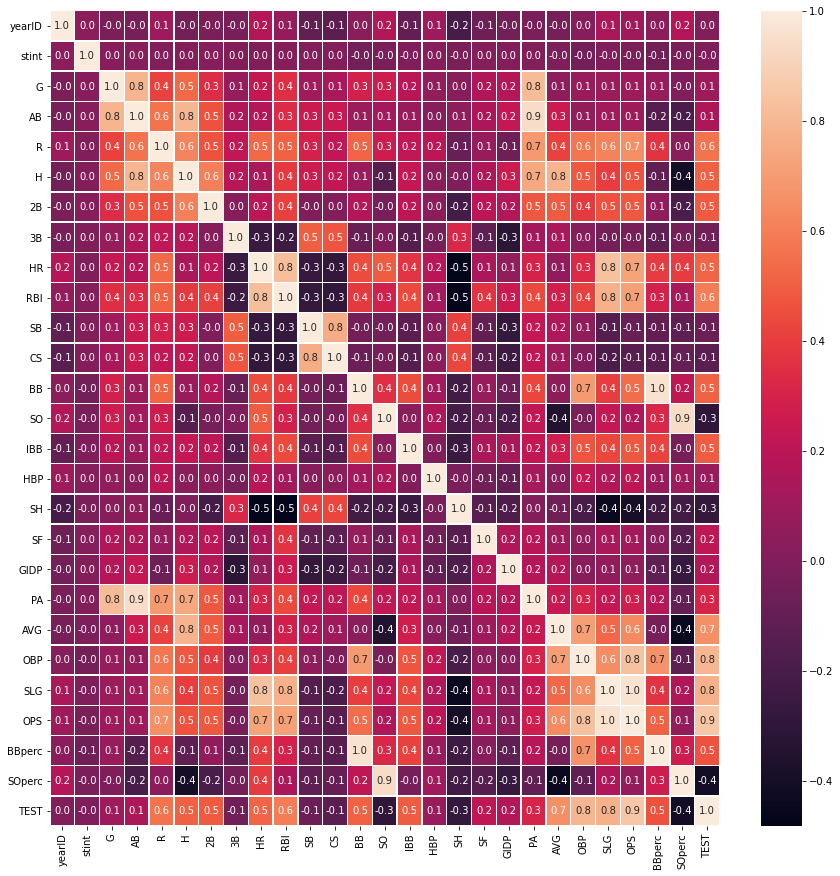

In [68]:
#CORRELATION HEAT MAP

#Creating new Dataframe with last decade (skipping 2020 due to reduced Plate Appearances)
season2010s = batters.loc[(batters.yearID > 2009) & (batting.PA > 502)].copy()

f,ax = plt.subplots(figsize=(15, 15))
sns.heatmap(season2010s.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.yticks(rotation=0)
plt.show()

In [69]:
#Picking out individual columns for further exploration

season2010s[["TEST","AVG","OBP","SLG","OPS","BBperc","BB","SO","SOperc","HR","RBI"]].corr()

,TEST,AVG,OBP,SLG,OPS,BBperc,BB,SO,SOperc,HR,RBI
TEST,1.000000,0.656594,0.794762,0.777698,0.853287,0.463701,0.508887,-0.294839,-0.408137,0.519074,0.595530
AVG,0.656594,1.000000,0.706925,0.526962,0.640245,-0.031100,0.037830,-0.350952,-0.440196,0.060338,0.282808
OBP,0.794762,0.706925,1.000000,0.648879,0.835761,0.667027,0.690926,-0.013689,-0.116886,0.329081,0.403961
SLG,0.777698,0.526962,0.648879,1.000000,0.960087,0.367836,0.400496,0.235031,0.160138,0.835198,0.779867
OPS,0.853287,0.640245,0.835761,0.960087,1.000000,0.510430,0.542848,0.164556,0.072513,0.723622,0.711260
BBperc,0.463701,-0.031100,0.667027,0.367836,0.510430,1.000000,0.963126,0.325268,0.268021,0.397639,0.296813
BB,0.508887,0.037830,0.690926,0.400496,0.542848,0.963126,1.000000,0.353295,0.213557,0.447469,0.388100
SO,-0.294839,-0.350952,-0.013689,0.235031,0.164556,0.325268,0.353295,1.000000,0.940617,0.492184,0.291223
SOperc,-0.408137,-0.440196,-0.116886,0.160138,0.072513,0.268021,0.213557,0.940617,1.000000,0.394785,0.148180
HR,0.519074,0.060338,0.329081,0.835198,0.723622,0.397639,0.447469,0.492184,0.394785,1.000000,0.824714


The highest correlation for the TEST metric is OPS with a pearson correlation coefficient of 0.853. Although similar, there is a slight difference in the value of SLG. The coefficient between OPS and SLG is 0.960, while the coefficient between TEST and SLG is 0.778. 

The negative value in TEST from strikeout percentage is only -0.408, indicating a negative correlation to a moderate degree. This is similar to the 0.464 coefficient from walks percentage, albeit a positive relationship. Both are correlated to a moderate degree, but represent a smaller correlation than the value brought by base hits, as shown by SLG, AVG, and even HR.  
  

## Runs and Wins

A major reason for current performance metrics is related to how we view value. Without diving into more advanced statistics of Run Creation (To be explored in next notebooks), how does this TEST metric relate to runs?

In [118]:
#IMPORTING TEAM STATISTICS DATA SET PER YEAR
teams = pd.read_csv(r'C:\Users\ncfis\Desktop\Python Files\Tests\Baseball\Teams.csv')


In [120]:
#CREATING ADDITIONAL COLUMNS IN DATAFRAME

teams['PA'] = teams['AB'] + teams['HBP'] + teams['SF'] + teams["BB"]
teams['AVG'] = teams["H"]/teams["AB"]
teams['OBP'] = (teams["H"]+teams["BB"]+teams["HBP"])/(teams["BB"]+teams["HBP"]+teams["AB"]+teams["SF"])
teams['SLG'] = ((teams["H"]-(teams['2B']+teams['3B']+teams['HR'])) +(teams['2B']*2)+ (teams['3B']*3)+ (teams['HR']*4)) / (teams['AB']) 
teams['Test_SLG'] = ((teams["H"]-(teams['2B']+teams['3B']+teams['HR'])) +(teams['2B']*2)+ (teams['3B']*3)+ (teams['HR']*4)) / (teams['PA']) 
teams['OPS'] = teams['SLG'] + teams['OBP']

teams['AVG'] = teams['AVG'].round(decimals = 3)
teams['OBP'] = teams['OBP'].round(decimals = 3)
teams['SLG'] = teams['SLG'].round(decimals = 3)
teams['OPS'] = teams['OPS'].round(decimals = 3)

In [121]:
#Creating columns for Walks / PA  and  Strikeouts / PA
teams['BBperc'] = teams['BB'] / teams['PA']
teams['SOperc'] = teams['SO'] / teams['PA']
teams['BBperc'] = teams['BBperc'].round(decimals = 3)
teams['SOperc'] = teams['SOperc'].round(decimals = 3)

In [122]:
teams["TEST"] = teams["Test_SLG"]+teams["BBperc"] - teams["SOperc"]

In [123]:
teams.loc[(teams.yearID == 2020) & (teams.PA > 180)].sort_values(by = "TEST", ascending = False).head(10)

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,DivWin,WCWin,LgWin,WSWin,R,AB,H,2B,3B,HR,BB,SO,SB,CS,HBP,SF,RA,ER,ERA,CG,SHO,SV,IPouts,HA,HRA,BBA,SOA,E,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro,PA,AVG,OBP,SLG,Test_SLG,OPS,BBperc,SOperc,TEST
2938,2020,NL,LAN,LAD,W,1,60,30.0,43,17,Y,N,Y,Y,349,2042,523,97,6,118,228.0,471.0,29.0,8.0,30.0,12.0,213,181,3.02,0,0,15,1616,424,66,145,517,40,46,0.982,Los Angeles Dodgers,Dodger Stadium,0.0,97,94,LAD,LAN,LAN,2312.0,0.256,0.338,0.483,0.426471,0.821,0.099,0.204,0.321471
2947,2020,NL,SDN,SDP,W,2,60,32.0,37,23,N,Y,N,N,325,1972,506,103,12,95,204.0,479.0,55.0,13.0,28.0,14.0,241,223,3.86,1,1,13,1561,456,70,170,565,32,46,0.985,San Diego Padres,Petco Park,0.0,94,95,SDP,SDN,SDN,2218.0,0.257,0.333,0.466,0.413886,0.798,0.092,0.216,0.289886
2942,2020,AL,NYA,NYY,E,2,60,31.0,33,27,N,Y,N,N,315,1915,473,87,7,94,251.0,480.0,27.0,7.0,30.0,11.0,270,242,4.35,2,1,14,1502,455,83,168,528,48,37,0.976,New York Yankees,Yankee Stadium III,0.0,98,96,NYY,NYA,NYA,2207.0,0.247,0.342,0.447,0.387857,0.789,0.114,0.217,0.284857
2926,2020,NL,ATL,ATL,E,1,60,30.0,35,25,Y,N,N,N,348,2074,556,130,3,103,239.0,573.0,23.0,4.0,23.0,7.0,288,257,4.41,0,0,13,1573,494,69,220,506,33,52,0.985,Atlanta Braves,SunTrust Park,0.0,107,106,ATL,ATL,ATL,2343.0,0.268,0.349,0.483,0.427230,0.832,0.102,0.245,0.284230
2943,2020,NL,NYN,NYM,E,4,60,29.0,26,34,N,N,N,N,286,2023,551,106,7,86,197.0,498.0,20.0,10.0,45.0,13.0,308,284,4.98,0,0,11,1540,511,81,219,574,32,39,0.985,New York Mets,Citi Field,0.0,94,94,NYM,NYN,NYN,2278.0,0.272,0.348,0.459,0.407814,0.807,0.086,0.219,0.274814
2945,2020,NL,PHI,PHI,E,3,60,32.0,28,32,N,N,N,N,306,1948,500,90,10,82,229.0,480.0,35.0,8.0,28.0,10.0,311,284,5.14,3,2,11,1491,550,80,185,532,35,57,0.983,Philadelphia Phillies,Citizens Bank Park,0.0,101,101,PHI,PHI,PHI,2215.0,0.257,0.342,0.439,0.386456,0.781,0.103,0.217,0.272456
2949,2020,NL,SFN,SFG,W,3,60,33.0,29,31,N,N,N,N,299,2019,532,107,14,81,195.0,499.0,19.0,8.0,27.0,13.0,297,267,4.64,1,0,13,1553,474,69,210,488,41,43,0.980,San Francisco Giants,Oracle Park,0.0,94,95,SFG,SFN,SFN,2254.0,0.263,0.335,0.451,0.403727,0.785,0.087,0.221,0.269727
2937,2020,AL,LAA,ANA,W,4,60,31.0,26,34,N,N,N,N,294,2020,501,97,8,85,239.0,490.0,21.0,8.0,25.0,18.0,321,297,5.09,1,0,12,1576,492,82,199,523,36,36,0.983,Los Angeles Angels of Anaheim,Angel Stadium of Anaheim,0.0,100,101,LAA,ANA,ANA,2302.0,0.248,0.332,0.430,0.377498,0.763,0.104,0.213,0.268498
2954,2020,NL,WAS,WSN,E,4,60,33.0,26,34,N,N,N,N,293,1968,519,112,12,66,192.0,451.0,33.0,12.0,32.0,21.0,301,285,5.09,2,0,12,1511,548,94,216,508,39,48,0.981,Washington Nationals,Nationals Park,0.0,103,102,WSN,MON,WAS,2213.0,0.264,0.336,0.433,0.385450,0.769,0.087,0.204,0.268450
2953,2020,AL,TOR,TOR,E,3,60,26.0,32,28,N,Y,N,N,302,2023,516,104,4,88,203.0,508.0,33.0,6.0,12.0,14.0,312,268,4.60,0,0,17,1574,517,81,250,519,38,47,0.982,Toronto Blue Jays,Sahlen Field,0.0,100,99,TOR,TOR,TOR,2252.0,0.255,0.325,0.441,0.396092,0.766,0.090,0.226,0.260092


In [124]:
teams.loc[(teams.yearID == 2020) & (teams.PA > 180)].sort_values(by = "R", ascending = False).head(10)

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,DivWin,WCWin,LgWin,WSWin,R,AB,H,2B,3B,HR,BB,SO,SB,CS,HBP,SF,RA,ER,ERA,CG,SHO,SV,IPouts,HA,HRA,BBA,SOA,E,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro,PA,AVG,OBP,SLG,Test_SLG,OPS,BBperc,SOperc,TEST
2938,2020,NL,LAN,LAD,W,1,60,30.0,43,17,Y,N,Y,Y,349,2042,523,97,6,118,228.0,471.0,29.0,8.0,30.0,12.0,213,181,3.02,0,0,15,1616,424,66,145,517,40,46,0.982,Los Angeles Dodgers,Dodger Stadium,0.0,97,94,LAD,LAN,LAN,2312.0,0.256,0.338,0.483,0.426471,0.821,0.099,0.204,0.321471
2926,2020,NL,ATL,ATL,E,1,60,30.0,35,25,Y,N,N,N,348,2074,556,130,3,103,239.0,573.0,23.0,4.0,23.0,7.0,288,257,4.41,0,0,13,1573,494,69,220,506,33,52,0.985,Atlanta Braves,SunTrust Park,0.0,107,106,ATL,ATL,ATL,2343.0,0.268,0.349,0.483,0.427230,0.832,0.102,0.245,0.284230
2947,2020,NL,SDN,SDP,W,2,60,32.0,37,23,N,Y,N,N,325,1972,506,103,12,95,204.0,479.0,55.0,13.0,28.0,14.0,241,223,3.86,1,1,13,1561,456,70,170,565,32,46,0.985,San Diego Padres,Petco Park,0.0,94,95,SDP,SDN,SDN,2218.0,0.257,0.333,0.466,0.413886,0.798,0.092,0.216,0.289886
2942,2020,AL,NYA,NYY,E,2,60,31.0,33,27,N,Y,N,N,315,1915,473,87,7,94,251.0,480.0,27.0,7.0,30.0,11.0,270,242,4.35,2,1,14,1502,455,83,168,528,48,37,0.976,New York Yankees,Yankee Stadium III,0.0,98,96,NYY,NYA,NYA,2207.0,0.247,0.342,0.447,0.387857,0.789,0.114,0.217,0.284857
2929,2020,AL,CHA,CHW,C,2,60,30.0,35,25,N,Y,N,N,306,2047,534,94,6,96,179.0,571.0,20.0,8.0,24.0,13.0,246,223,3.81,1,1,13,1581,448,71,217,523,38,48,0.982,Chicago White Sox,Guaranteed Rate Field,0.0,99,100,CHW,CHA,CHA,2263.0,0.261,0.326,0.453,0.410075,0.779,0.079,0.252,0.237075
2945,2020,NL,PHI,PHI,E,3,60,32.0,28,32,N,N,N,N,306,1948,500,90,10,82,229.0,480.0,35.0,8.0,28.0,10.0,311,284,5.14,3,2,11,1491,550,80,185,532,35,57,0.983,Philadelphia Phillies,Citizens Bank Park,0.0,101,101,PHI,PHI,PHI,2215.0,0.257,0.342,0.439,0.386456,0.781,0.103,0.217,0.272456
2953,2020,AL,TOR,TOR,E,3,60,26.0,32,28,N,Y,N,N,302,2023,516,104,4,88,203.0,508.0,33.0,6.0,12.0,14.0,312,268,4.60,0,0,17,1574,517,81,250,519,38,47,0.982,Toronto Blue Jays,Sahlen Field,0.0,100,99,TOR,TOR,TOR,2252.0,0.255,0.325,0.441,0.396092,0.766,0.090,0.226,0.260092
2949,2020,NL,SFN,SFG,W,3,60,33.0,29,31,N,N,N,N,299,2019,532,107,14,81,195.0,499.0,19.0,8.0,27.0,13.0,297,267,4.64,1,0,13,1553,474,69,210,488,41,43,0.980,San Francisco Giants,Oracle Park,0.0,94,95,SFG,SFN,SFN,2254.0,0.263,0.335,0.451,0.403727,0.785,0.087,0.221,0.269727
2937,2020,AL,LAA,ANA,W,4,60,31.0,26,34,N,N,N,N,294,2020,501,97,8,85,239.0,490.0,21.0,8.0,25.0,18.0,321,297,5.09,1,0,12,1576,492,82,199,523,36,36,0.983,Los Angeles Angels of Anaheim,Angel Stadium of Anaheim,0.0,100,101,LAA,ANA,ANA,2302.0,0.248,0.332,0.430,0.377498,0.763,0.104,0.213,0.268498
2954,2020,NL,WAS,WSN,E,4,60,33.0,26,34,N,N,N,N,293,1968,519,112,12,66,192.0,451.0,33.0,12.0,32.0,21.0,301,285,5.09,2,0,12,1511,548,94,216,508,39,48,0.981,Washington Nationals,Nationals Park,0.0,103,102,WSN,MON,WAS,2213.0,0.264,0.336,0.433,0.385450,0.769,0.087,0.204,0.268450


In [125]:
#Correlation stats from entire data set (years 1871 - 2020)

teams[["TEST","OPS","AVG","OBP","SLG","SOperc","BBperc","W","R"]].corr()

,TEST,OPS,AVG,OBP,SLG,SOperc,BBperc,W,R
TEST,1.000000,0.656947,0.798431,0.778706,0.542020,-0.667188,0.360443,0.415286,0.575680
OPS,0.656947,1.000000,0.772221,0.856764,0.972729,0.111343,0.377257,0.365840,0.696072
AVG,0.798431,0.772221,1.000000,0.832833,0.629712,-0.361449,0.109967,0.324084,0.644308
OBP,0.778706,0.856764,0.832833,1.000000,0.714034,-0.212544,0.618299,0.418939,0.657909
SLG,0.542020,0.972729,0.629712,0.714034,1.000000,0.246728,0.234038,0.497254,0.715758
SOperc,-0.667188,0.111343,-0.361449,-0.212544,0.246728,1.000000,-0.046775,-0.189751,-0.086236
BBperc,0.360443,0.377257,0.109967,0.618299,0.234038,-0.046775,1.000000,0.240609,0.267999
W,0.415286,0.365840,0.324084,0.418939,0.497254,-0.189751,0.240609,1.000000,0.701245
R,0.575680,0.696072,0.644308,0.657909,0.715758,-0.086236,0.267999,0.701245,1.000000


General correlation results show less of a correlation between the TEST column and Runs scored (0.576) compared to OPS and Runs scored (0.696). Interesting results in the filters from 2020 for the teams with most runs scored vs. teams with highest TEST ratings. Teams like the Mets ranked high in TEST but lower in Runs scored in 2020. Let's try with a narrower set of data by using the past decade for seeing the top teams and correlation:

In [108]:
teams.loc[(teams.yearID > 2010) & (teams.PA > 5003)].sort_values(by = "TEST", ascending = False).head(15)

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,DivWin,WCWin,LgWin,WSWin,R,AB,H,2B,3B,HR,BB,SO,SB,CS,HBP,SF,RA,ER,ERA,CG,SHO,SV,IPouts,HA,HRA,BBA,SOA,E,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro,PA,AVG,OBP,SLG,Test_SLG,OPS,BBperc,SOperc,TEST
2905,2019,AL,HOU,HOU,W,1,162,81.0,107,55,Y,N,Y,N,920,5613,1538,323,28,288,645.0,1166.0,67.0,27.0,66.0,57.0,640,595,3.66,2,14,47,4387,1205,230,448,1671,71,96,0.988,Houston Astros,Minute Maid Park,2857367.0,103,100,HOU,HOU,HOU,6381.0,0.274,0.352,0.495,0.435825,0.848,0.101,0.183,0.353825
2682,2011,AL,TEX,TEX,W,1,162,81.0,96,66,Y,N,Y,N,855,5659,1599,310,32,210,475.0,930.0,143.0,45.0,39.0,49.0,677,607,3.79,10,19,38,4324,1327,170,461,1179,114,164,0.981,Texas Rangers,Rangers Ballpark in Arlington,2946949.0,117,115,TEX,TEX,TEX,6222.0,0.283,0.340,0.460,0.418354,0.800,0.076,0.149,0.345354
2845,2017,AL,HOU,HOU,W,1,162,81.0,101,61,Y,N,Y,Y,896,5611,1581,346,20,238,509.0,1087.0,98.0,42.0,70.0,61.0,700,662,4.12,1,9,45,4338,1314,192,522,1593,99,153,0.983,Houston Astros,Minute Maid Park,2403671.0,91,90,HOU,HOU,HOU,6251.0,0.282,0.346,0.478,0.428891,0.823,0.081,0.174,0.335891
2658,2011,AL,BOS,BOS,E,3,162,81.0,90,72,N,N,N,N,875,5710,1600,352,35,203,578.0,1108.0,102.0,42.0,50.0,50.0,737,680,4.20,2,13,36,4372,1366,156,540,1213,92,120,0.985,Boston Red Sox,Fenway Park II,3054001.0,106,105,BOS,BOS,BOS,6388.0,0.280,0.349,0.461,0.411866,0.810,0.090,0.173,0.328866
2808,2016,AL,BOS,BOS,E,1,162,81.0,93,69,Y,N,N,N,878,5670,1598,343,25,208,558.0,1160.0,83.0,24.0,43.0,40.0,694,640,4.00,9,5,43,4319,1342,176,490,1362,75,139,0.987,Boston Red Sox,Fenway Park II,2955434.0,108,106,BOS,BOS,BOS,6311.0,0.282,0.348,0.461,0.414356,0.810,0.088,0.184,0.318356
2911,2019,AL,MIN,MIN,C,1,162,81.0,101,61,Y,N,N,N,939,5732,1547,318,23,307,525.0,1334.0,28.0,21.0,81.0,41.0,754,680,4.18,1,10,50,4390,1456,198,452,1463,111,130,0.981,Minnesota Twins,Target Field,2294152.0,100,99,MIN,MIN,MIN,6379.0,0.270,0.338,0.494,0.443957,0.832,0.082,0.209,0.316957
2803,2015,AL,TOR,TOR,E,1,162,81.0,93,69,Y,N,N,N,891,5509,1480,308,17,232,570.0,1151.0,88.0,23.0,54.0,62.0,670,609,3.80,7,10,34,4323,1353,173,397,1117,88,145,0.985,Toronto Blue Jays,Rogers Centre,2794891.0,99,98,TOR,TOR,TOR,6195.0,0.269,0.340,0.457,0.406457,0.797,0.092,0.186,0.312457
2680,2011,NL,SLN,STL,C,2,162,81.0,90,72,N,Y,Y,Y,762,5532,1513,308,22,162,542.0,978.0,57.0,39.0,44.0,40.0,692,608,3.74,7,9,47,4386,1461,136,448,1098,116,167,0.982,St. Louis Cardinals,Busch Stadium III,3093954.0,95,94,STL,SLN,SLN,6158.0,0.273,0.341,0.425,0.381780,0.766,0.088,0.159,0.310780
2672,2011,AL,NYA,NYY,E,1,162,81.0,97,65,Y,N,N,N,867,5518,1452,267,33,222,627.0,1138.0,147.0,46.0,74.0,51.0,657,605,3.73,5,8,47,4375,1423,152,507,1222,102,141,0.983,New York Yankees,Yankee Stadium III,3653680.0,108,106,NYY,NYA,NYA,6270.0,0.263,0.343,0.444,0.390909,0.788,0.100,0.181,0.309909
2842,2017,AL,CLE,CLE,C,1,162,81.0,102,60,Y,N,N,N,818,5511,1449,333,29,212,604.0,1153.0,88.0,23.0,50.0,45.0,564,529,3.30,7,19,37,4322,1267,163,406,1614,76,167,0.987,Cleveland Indians,Progressive Field,2048138.0,106,104,CLE,CLE,CLE,6210.0,0.263,0.339,0.449,0.398712,0.788,0.097,0.186,0.309712


In [105]:
teams.loc[(teams.yearID > 2010) & (teams.PA > 503)].sort_values(by = "R", ascending = False).head(15)

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,DivWin,WCWin,LgWin,WSWin,R,AB,H,2B,3B,HR,BB,SO,SB,CS,HBP,SF,RA,ER,ERA,CG,SHO,SV,IPouts,HA,HRA,BBA,SOA,E,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro,PA,AVG,OBP,SLG,Test_SLG,OPS,BBperc,SOperc,TEST
2912,2019,AL,NYA,NYY,E,1,162,81.0,103,59,Y,N,N,N,943,5583,1493,290,17,306,569.0,1437.0,55.0,22.0,49.0,33.0,739,691,4.31,1,9,50,4329,1374,248,507,1534,102,135,0.982,New York Yankees,Yankee Stadium III,3304404.0,98,96,NYY,NYA,NYA,6234.0,0.267,0.339,0.490,0.438723,0.829,0.091,0.231,0.298723
2911,2019,AL,MIN,MIN,C,1,162,81.0,101,61,Y,N,N,N,939,5732,1547,318,23,307,525.0,1334.0,28.0,21.0,81.0,41.0,754,680,4.18,1,10,50,4390,1456,198,452,1463,111,130,0.981,Minnesota Twins,Target Field,2294152.0,100,99,MIN,MIN,MIN,6379.0,0.270,0.338,0.494,0.443957,0.832,0.082,0.209,0.316957
2905,2019,AL,HOU,HOU,W,1,162,81.0,107,55,Y,N,Y,N,920,5613,1538,323,28,288,645.0,1166.0,67.0,27.0,66.0,57.0,640,595,3.66,2,14,47,4387,1205,230,448,1671,71,96,0.988,Houston Astros,Minute Maid Park,2857367.0,103,100,HOU,HOU,HOU,6381.0,0.274,0.352,0.495,0.435825,0.848,0.101,0.183,0.353825
2898,2019,AL,BOS,BOS,E,3,162,81.0,84,78,N,N,N,N,901,5770,1554,345,27,245,590.0,1382.0,68.0,30.0,49.0,44.0,828,768,4.70,1,8,33,4413,1423,215,605,1633,88,115,0.985,Boston Red Sox,Fenway Park II,2924627.0,105,104,BOS,BOS,BOS,6453.0,0.269,0.340,0.466,0.416550,0.806,0.091,0.214,0.293550
2845,2017,AL,HOU,HOU,W,1,162,81.0,101,61,Y,N,Y,Y,896,5611,1581,346,20,238,509.0,1087.0,98.0,42.0,70.0,61.0,700,662,4.12,1,9,45,4338,1314,192,522,1593,99,153,0.983,Houston Astros,Minute Maid Park,2403671.0,91,90,HOU,HOU,HOU,6251.0,0.282,0.346,0.478,0.428891,0.823,0.081,0.174,0.335891
2803,2015,AL,TOR,TOR,E,1,162,81.0,93,69,Y,N,N,N,891,5509,1480,308,17,232,570.0,1151.0,88.0,23.0,54.0,62.0,670,609,3.80,7,10,34,4323,1353,173,397,1117,88,145,0.985,Toronto Blue Jays,Rogers Centre,2794891.0,99,98,TOR,TOR,TOR,6195.0,0.269,0.340,0.457,0.406457,0.797,0.092,0.186,0.312457
2908,2019,NL,LAN,LAD,W,1,162,81.0,106,56,Y,N,N,N,886,5493,1414,302,20,279,607.0,1356.0,57.0,10.0,81.0,45.0,613,541,3.37,3,18,44,4337,1201,185,392,1519,106,117,0.982,Los Angeles Dodgers,Dodger Stadium,3974309.0,96,94,LAD,LAN,LAN,6226.0,0.257,0.338,0.472,0.416479,0.810,0.097,0.218,0.295479
2808,2016,AL,BOS,BOS,E,1,162,81.0,93,69,Y,N,N,N,878,5670,1598,343,25,208,558.0,1160.0,83.0,24.0,43.0,40.0,694,640,4.00,9,5,43,4319,1342,176,490,1362,75,139,0.987,Boston Red Sox,Fenway Park II,2955434.0,108,106,BOS,BOS,BOS,6311.0,0.282,0.348,0.461,0.414356,0.810,0.088,0.184,0.318356
2868,2018,AL,BOS,BOS,E,1,162,81.0,108,54,Y,N,Y,Y,876,5623,1509,355,31,208,569.0,1253.0,125.0,31.0,55.0,48.0,647,608,3.75,2,14,46,4376,1305,176,512,1558,77,106,0.987,Boston Red Sox,Fenway Park II,2895575.0,104,102,BOS,BOS,BOS,6295.0,0.268,0.339,0.453,0.405083,0.792,0.090,0.199,0.296083
2658,2011,AL,BOS,BOS,E,3,162,81.0,90,72,N,N,N,N,875,5710,1600,352,35,203,578.0,1108.0,102.0,42.0,50.0,50.0,737,680,4.20,2,13,36,4372,1366,156,540,1213,92,120,0.985,Boston Red Sox,Fenway Park II,3054001.0,106,105,BOS,BOS,BOS,6388.0,0.280,0.349,0.461,0.411866,0.810,0.090,0.173,0.328866


An initial look into the top run scoring teams per season vs top TEST scores show that there are some major differences. The two top run scoring seasons were the 2019 Yankees and 2019 Twins, however, both are outside of the top 5 in using the TEST measurement of SLG + BB/PA - K/PA.

In [109]:
teams.loc[teams.yearID > 2010][["TEST","OPS","AVG","OBP","SLG","SOperc","BBperc","W","R"]].corr()

,TEST,OPS,AVG,OBP,SLG,SOperc,BBperc,W,R
TEST,1.000000,0.825001,0.781823,0.826737,0.761326,-0.624978,0.270839,0.427493,0.477540
OPS,0.825001,1.000000,0.684167,0.876652,0.977448,-0.092724,0.427947,0.259042,0.381253
AVG,0.781823,0.684167,1.000000,0.737339,0.608881,-0.554149,-0.134140,0.391368,0.488511
OBP,0.826737,0.876652,0.737339,1.000000,0.755638,-0.306698,0.550070,0.311988,0.349216
SLG,0.761326,0.977448,0.608881,0.755638,1.000000,0.007772,0.341166,0.215467,0.365946
SOperc,-0.624978,-0.092724,-0.554149,-0.306698,0.007772,1.000000,0.197630,-0.405381,-0.331482
BBperc,0.270839,0.427947,-0.134140,0.550070,0.341166,0.197630,1.000000,0.021969,-0.040478
W,0.427493,0.259042,0.391368,0.311988,0.215467,-0.405381,0.021969,1.000000,0.866982
R,0.477540,0.381253,0.488511,0.349216,0.365946,-0.331482,-0.040478,0.866982,1.000000


Both OPS and TEST columns have a small, moderate degree of correlation with Runs and Wins. Nothing significant to note. This indicates further exploration is required to improve TEST column.